In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cartoonize_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to reduce noise
    gray = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter to smooth the image while preserving edges
    color = cv2.bilateralFilter(image, 9, 300, 300)

    # Combine edges and color image
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    
    return cartoon

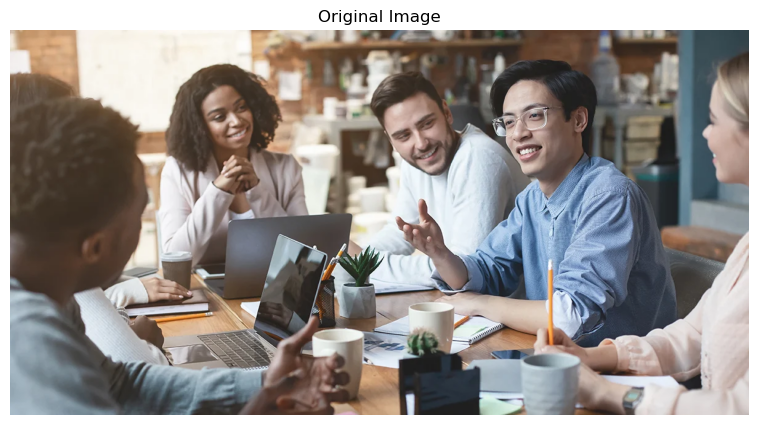

In [4]:
# Load an image
image_path = 'image.png'  # Replace with your image path
image = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

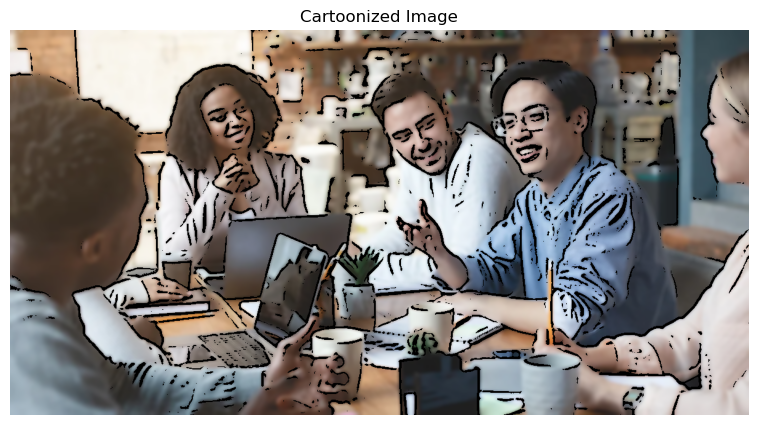

In [5]:
# Apply cartoonization
cartoon_image = cartoonize_image(image)

# Display the cartoonized image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB))
plt.title("Cartoonized Image")
plt.axis('off')
plt.show()